# Make Rectangle and Ellipse

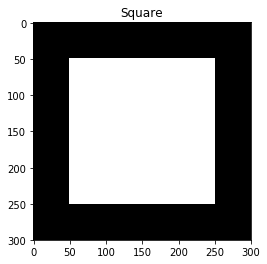

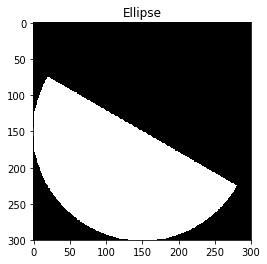

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

square = np.zeros((300, 300), np.uint8)
cv2.rectangle(square, (50, 50), (250, 250), 255, -2)
cv2.imshow("Square", square)
cv2.waitKey(0)

plt.imshow(square, cmap="gray")
plt.title('Square')
plt.show()

ellipse = np.zeros((300, 300), np.uint8)
cv2.ellipse(ellipse, (150, 150), (150, 150), 30, 0, 180, 255, -1)
cv2.imshow("Ellipse", ellipse)
cv2.waitKey(0)

plt.imshow(ellipse, cmap="gray")
plt.title('Ellipse')
plt.show()

cv2.destroyAllWindows()

# AND - OR - NOT - XOR

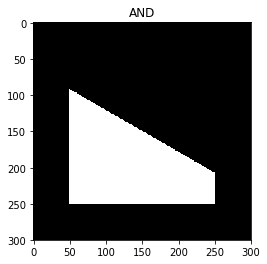

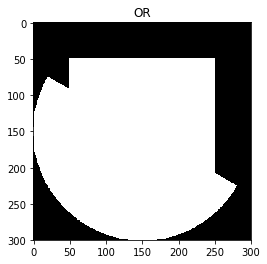

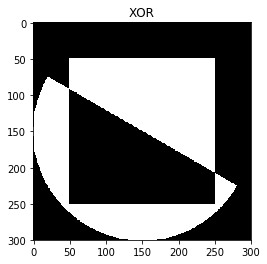

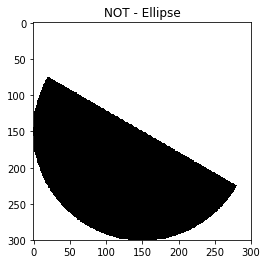

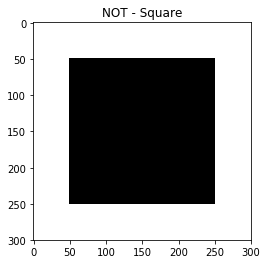

In [5]:
bitwiseAnd = cv2.bitwise_and(square, ellipse)
cv2.imshow("AND", bitwiseAnd)
cv2.waitKey(0)

plt.imshow(bitwiseAnd, cmap="gray")
plt.title('AND')
plt.show()

bitwiseOr = cv2.bitwise_or(square, ellipse)
cv2.imshow("OR", bitwiseOr)
cv2.waitKey(0) 

plt.imshow(bitwiseOr, cmap="gray")
plt.title('OR')
plt.show()

bitwiseXor = cv2.bitwise_xor(square, ellipse)
cv2.imshow("XOR", bitwiseXor)
cv2.waitKey(0)

plt.imshow(bitwiseXor, cmap="gray")
plt.title('XOR')
plt.show()

bitwiseNot_el = cv2.bitwise_not(ellipse)
cv2.imshow("NOT - ellipse", bitwiseNot_el)
cv2.waitKey(0)

plt.imshow(bitwiseNot_el, cmap="gray")
plt.title('NOT - Ellipse')
plt.show()

bitwiseNot_sq = cv2.bitwise_not(square)
cv2.imshow("NOT - square", bitwiseNot_sq)
cv2.waitKey(0)

plt.imshow(bitwiseNot_sq, cmap="gray")
plt.title('NOT - Square')
plt.show()

cv2.destroyAllWindows()

# Example For Masking USAGE

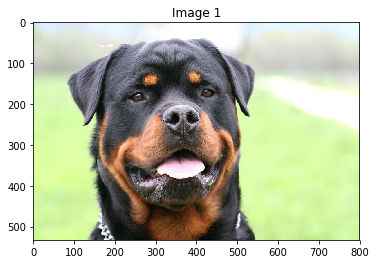

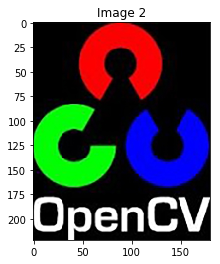

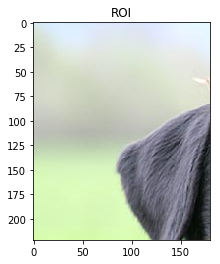

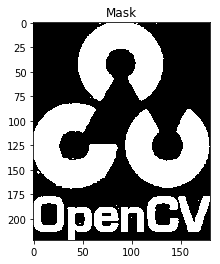

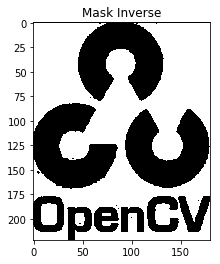

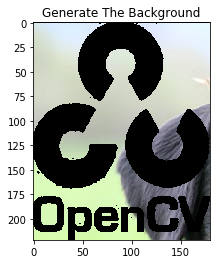

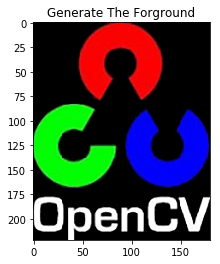

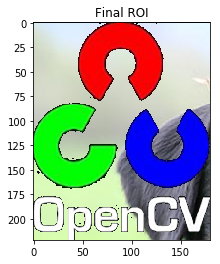

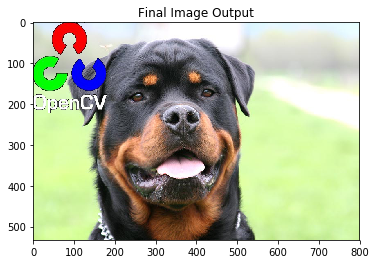

In [6]:
img1 = cv2.imread('../Data/Images/rot.jpg')
img2 = cv2.imread('../Data/Images/ocv_logo.jpg')
img2 = cv2.resize(img2, None, fx=0.3, fy=0.3)



cv2.imshow("Image 1", img1)
cv2.waitKey(0)
plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
plt.title('Image 1')
plt.show()


cv2.imshow("Image 2", img2)
cv2.waitKey(0)
plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
plt.title('Image 2')
plt.show()



rows,cols,channels = img2.shape
roi = img1[0:rows, 0:cols ]

cv2.imshow("ROI", roi)
cv2.waitKey(0)
plt.imshow(cv2.cvtColor(roi, cv2.COLOR_BGR2RGB))
plt.title('ROI')
plt.show()




# Now create a mask of logo and create its inverse mask also
img2gray = cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)
ret, mask = cv2.threshold(img2gray, 10, 255, cv2.THRESH_BINARY)
mask_inv = cv2.bitwise_not(mask)


cv2.imshow("Mask", mask)
cv2.waitKey(0)
plt.imshow(mask, cmap="gray")
plt.title('Mask')
plt.show()


cv2.imshow("Mask Inverse", mask_inv)
cv2.waitKey(0)
plt.imshow(mask_inv, cmap="gray")
plt.title('Mask Inverse')
plt.show()



# Now black-out the area of logo in ROI
img1_bg = cv2.bitwise_and(roi,roi,mask = mask_inv)

cv2.imshow("Generate The Background", img1_bg)
cv2.waitKey(0)
plt.imshow(cv2.cvtColor(img1_bg, cv2.COLOR_BGR2RGB))
plt.title('Generate The Background')
plt.show()



# Take only region of logo from logo image.
img2_fg = cv2.bitwise_and(img2,img2,mask = mask)

cv2.imshow("Generate The Forground", img2_fg)
cv2.waitKey(0)
plt.imshow(cv2.cvtColor(img2_fg, cv2.COLOR_BGR2RGB))
plt.title('Generate The Forground')
plt.show()




# Put logo in ROI and modify the main image
dst = cv2.add(img1_bg,img2_fg)

cv2.imshow("Final ROI", dst)
cv2.waitKey(0)
plt.imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))
plt.title('Final ROI')
plt.show()



img1[0:rows, 0:cols ] = dst

cv2.imshow("Final Image Output", img1)
cv2.waitKey(0)
plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
plt.title('Final Image Output')
plt.show()


cv2.destroyAllWindows()

# Resources

https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_core/py_image_arithmetics/py_image_arithmetics.html#arithmetic-operations-on-images